In [1]:
# general traffic sign reckognition benchmark GTSDB
# Kaggle.com - zbiory danych - Titanic
# vgg, googleNet, Alexet, ResNet, DanNEt

In [2]:
# The German Traffic Sign Recognition Benchmark
#
# sample code for reading the traffic sign images and the
# corresponding labels
#
# example:
#
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()
#
# have fun, Christian

import matplotlib.pyplot as plt
import csv


# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = []  # images
    labels = []  # corresponding labels
    # loop over all 42 classes
    for c in range(0, 43):
        prefix = rootpath + '/' + format(c,
                                         '05d') + '/'  # subdirectory for class
        gtFile = open(prefix + 'GT-' + format(c, '05d') +
                      '.csv')  # annotations file
        gtReader = csv.reader(gtFile,
                              delimiter=';')  # csv parser for annotations file
        gtReader.next()  # skip header
        # loop over all images in current annotations file
        for idx, row in enumerate(gtReader):
            if idx == 0:
                continue
            images.append(plt.imread(prefix +
                                     row[0]))  # the 1th column is the filename
            labels.append(row[7])  # the 8th column is the label
        gtFile.close()
    return images, labels

In [38]:
images, labels = readTrafficSigns("GTSRB\Final_Training\Images")

AttributeError: '_csv.reader' object has no attribute 'next'

In [4]:
import matplotlib.pyplot as plt
import torch
import torchvision
# from torchsummary import summary

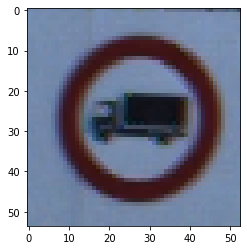

In [5]:
img = plt.imread("GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/00000.ppm")
plt.imshow(img)

In [15]:
from torch.utils.data import Dataset
import numpy as np
import random
import os
import torch
import csv


def crawl(path):
    return [path + relative_path for relative_path in os.listdir(path)]


class LoaderZnaki(Dataset):
    def __init__(self, path, shuffle=False, transform=None) -> None:
        super().__init__()
        self.transform = transform
        self.shuffle = shuffle

        # if not os.path.isfile(path):
        #     raise Exception("File does not exist" + path)

        self.images = np.array([])
        self.labels = np.array([])


        # self.images = crawl(path)
        with open(path + "/GT-final_test.test.csv") as file:
            gtReader = csv.reader(file,
                                delimiter=';')  # csv parser for annotations file
            # gtReader.next()
            headers = True
            for elem in gtReader:
                if headers:
                    headers = False
                    continue
                self.images = np.append(self.images, path + elem[0])

                self.labels = np.append(
                    self.labels, (elem[-4], elem[-3], elem[-2], elem[-1])
                    )

        # self.images = np.array([
        #     plt.imread(path) for path in paths
        # ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        if index > self.__len__():
            return
        if self.shuffle:
            index=random.randint(0, self.__len__())

        image=plt.imread(self.images[index])

        if self.transform:
            image=self.transform(image)
        else:
            image=torch.from_numpy(image)

        return image, self.labels[index]


In [16]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = torch.transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}

In [20]:
import matplotlib.patches as patches

def show_tensor(tensor):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(images)

    # Create a Rectangle patch
    rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    if isinstance (tensor, np.array):
        plt.imshow(tensor)
    # plt.imshow(np.moveaxis(tensor.numpy()*255, 0, -1))
    plt.show()

data_loader = LoaderZnaki(
    "GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/", transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        #    Rescale((50, 50)),
        torchvision.transforms.Normalize(
            (0.1307,), (0.3081,))
    ])
)


In [21]:

for image, label in data_loader:
    print(image.shape)
    # plt.imshow(image.reshape((54,53,3)))
    show_tensor(image)
    
    break


torch.Size([3, 54, 53])


TypeError: isinstance() arg 2 must be a type or tuple of types